# CNN on (Fashion) MNIST using TF 2.0

In [1]:
# Standard Python libraries
import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL

try:
    import imageio
except ModuleNotFoundError:
    %pip install -qq imageio
    import imageio
from IPython import display
import sklearn
from time import time

In [2]:
try:
    import probml_utils.mnist_helper_tf as helper
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils.mnist_helper_tf as helper

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 272 kB 4.1 MB/s 
     |████████████████████████████████| 119 kB 65.4 MB/s 
     |████████████████████████████████| 88 kB 8.7 MB/s 
     |████████████████████████████████| 72 kB 575 kB/s 
     |████████████████████████████████| 1.1 MB 82.7 MB/s 


In [3]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
try:
    import tensorflow as tf
except ModuleNotFoundError:
    %pip install -qq tensorflow
    import tensorflow as tf

from tensorflow import keras

assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices("GPU"):
    print("No GPU was detected. DNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


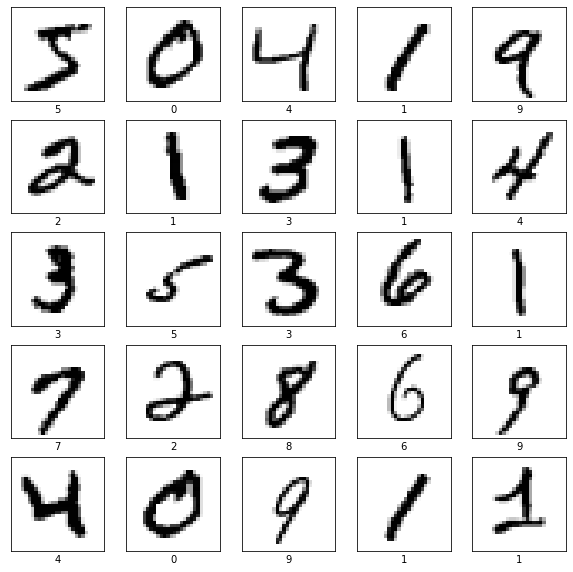

In [4]:
train_images, train_labels, test_images, test_labels, class_names = helper.get_dataset(FASHION=False)
print(train_images.shape)
helper.plot_dataset(train_images, train_labels, class_names)

In [5]:
try:
    from tensorflow.keras import datasets, layers, models
except ModuleNotFoundError:
    %pip install -qq tensorflow
    from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

epoch 0
1875/1875 [==============================] - 18s 3ms/step - loss: 0.1502 - accuracy: 0.9532
time spent training 18.256
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0429 - accuracy: 0.9870
Train accuracy: 0.9870333075523376
313/313 [==============================] - 1s 3ms/step - loss: 0.0411 - accuracy: 0.9871
Test accuracy: 0.9871000051498413
(129,)


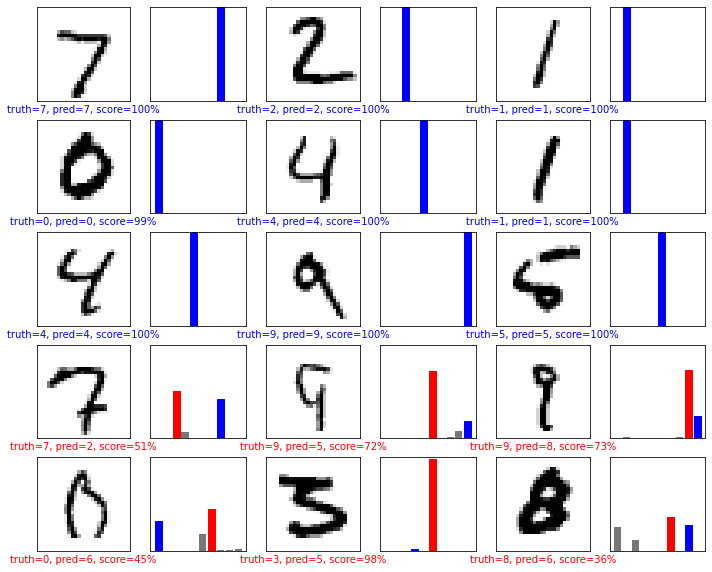

epoch 1
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0470 - accuracy: 0.9852
time spent training 10.507
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0439 - accuracy: 0.9859
Train accuracy: 0.9859166741371155
313/313 [==============================] - 1s 3ms/step - loss: 0.0466 - accuracy: 0.9846
Test accuracy: 0.9846000075340271


<Figure size 432x288 with 0 Axes>

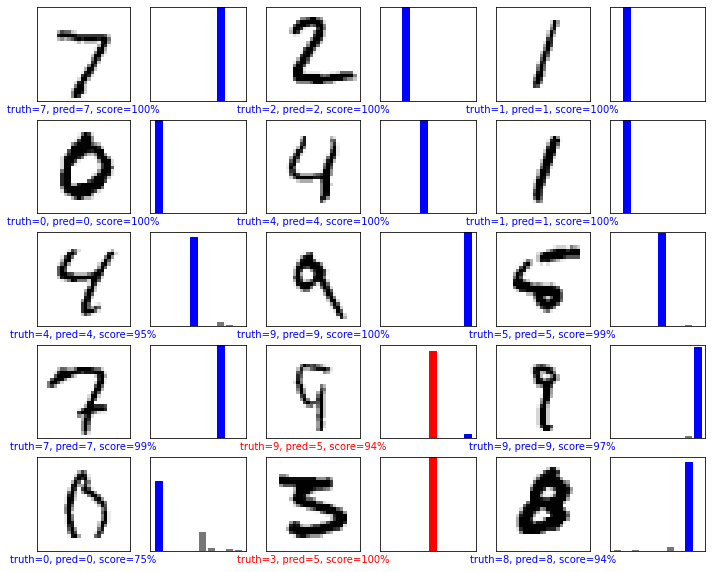

<Figure size 432x288 with 0 Axes>

In [7]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

for epoch in range(2):
    print(f"epoch {epoch}")
    time_start = time()
    model.fit(train_images, train_labels, epochs=1)
    print("time spent training {:0.3f}".format(time() - time_start))

    train_loss, train_acc = model.evaluate(train_images, train_labels)
    print("Train accuracy:", train_acc)
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print("Test accuracy:", test_acc)

    predictions = model.predict(test_images)
    if epoch == 0:
        ndx = helper.find_interesting_test_images(predictions, test_labels)
    helper.plot_interesting_test_results(test_images, test_labels, predictions, class_names, ndx)
    plt.suptitle(f"epoch {epoch}")